In [3]:
!pip3 install featuretools[complete]

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 321.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 MB 11.2 MB/s eta 0:00:0000:0100:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━

In [7]:
import featuretools as ft

data = ft.demo.load_mock_customer()

2024-07-24 10:41:06,089 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "DiversityScore" from "premium_primitives.diversity_score" because a primitive with that name already exists in "nlp_primitives.diversity_score"
2024-07-24 10:41:06,091 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "LSA" from "premium_primitives.lsa" because a primitive with that name already exists in "nlp_primitives.lsa"
2024-07-24 10:41:06,093 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "MeanCharactersPerSentence" from "premium_primitives.mean_characters_per_sentence" because a primitive with that name already exists in "nlp_primitives.mean_characters_per_sentence"
2024-07-24 10:41:06,097 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "NumberOfSentences" from "premium_primi

An EntitySet is a collection of dataframes and the relationships between them. 

we add the transactions dataframe to the EntitySet. In the call to add_dataframe, we specify three important parameters:

The **index** parameter specifies the column that uniquely identifies rows in the dataframe.

The **time_index** parameter tells Featuretools when the data was created.

The **logical_types** parameter indicates that “product_id” should be interpreted as a Categorical column, even though it is just an integer in the underlying data.

In [17]:
!pip3 install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 870.3 kB/s eta 0:00:000:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [35]:
from woodwork.logical_types import Categorical, PostalCode

es = ft.EntitySet(id="customer_data")

transactions_df = data["transactions"].merge(data["sessions"]).merge(data["customers"])
products_df = data["products"]

es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=transactions_df,
    index="transaction_id",
    time_index="transaction_time",
    logical_types={
        "product_id": Categorical,
        "zip_code": PostalCode,
    },
)

es = es.add_dataframe(
    dataframe_name="products", 
    dataframe=products_df,
    index="product_id"
)

es

/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/r.de.9/mlearn/venv/lib/python3.12/site-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(


Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    No relationships

In [36]:
es["transactions"].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
transaction_id,Integer,['index']
session_id,Integer,['numeric']
transaction_time,Datetime,['time_index']
product_id,Categorical,['category']
amount,Double,['numeric']
customer_id,Integer,['numeric']
device,Categorical,['category']
session_start,Datetime,[]
zip_code,PostalCode,['category']


## Adding a Relationship
We want to relate these two dataframes by the columns called “product_id” in each dataframe. 
Each **product has multiple transactions associated with it, so it is called the parent dataframe**, while the **transactions dataframe is known as the child dataframe**. When specifying relationships, we need four parameters
- parent dataframe name
- parent column name 
- child dataframe name
- child column name
  
Note that each relationship must denote a **one-to-many relationship** rather than a relationship which is **one-to-one or many-to-many**.

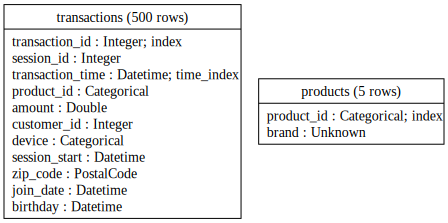

In [37]:
es.plot()

In [38]:
es.add_relationship("products", "product_id", "transactions", "product_id")

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    transactions.product_id -> products.product_id

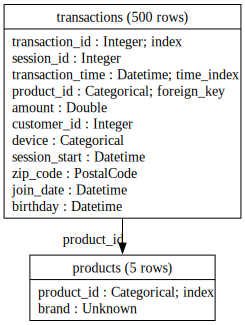

In [39]:
es.plot()